### Data Preprocessing Summary

1. **Data Import and Cleaning**
   - Loaded `traffic.csv` into a DataFrame.
   - Removed the `ID` column as it was not relevant to analysis.

2. **Datetime Conversion and Feature Extraction**
   - Converted `DateTime` to proper datetime format.
   - Extracted `Date`, `Time`, and `Day` (day of the week) from `DateTime`.
   - Dropped the original `DateTime` column.

3. **Further Date Decomposition**
   - Reconverted `Date` to datetime to ensure compatibility.
   - Extracted `Year`, `Month`, and `DayOfMonth`.
   - Dropped the `Date` column post-extraction.

4. **Column Reordering**
   - Final DataFrame column order: `['Year', 'Month', 'DayOfMonth', 'Time', 'Day', 'Junction', 'Vehicles']`.

5. **Data Type Adjustments**
   - Converted `Time` to string for consistent plotting and sorting.

This preprocessing ensures that the dataset is clean, chronologically decomposed, and ready for exploratory data analysis and visualization.


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv
data = pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [3]:
# Drop the 'ID' column
data.drop(columns=['ID'], inplace=True)

# Convert 'DateTime' to datetime format
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract 'Date', 'Time', and 'Day'
data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
data['Day'] = data['DateTime'].dt.day_name()

# Drop the original 'DateTime' column
data.drop(columns=['DateTime'], inplace=True)

# Reorder columns
data = data[['Date', 'Time', 'Day', 'Junction', 'Vehicles']]

# Preview
data.head()

,Date,Time,Day,Junction,Vehicles
0,2015-11-01,00:00:00,Sunday,1,15
1,2015-11-01,01:00:00,Sunday,1,13
2,2015-11-01,02:00:00,Sunday,1,10
3,2015-11-01,03:00:00,Sunday,1,7
4,2015-11-01,04:00:00,Sunday,1,9


In [4]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract Year, Month, and DayOfMonth
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfMonth'] = data['Date'].dt.day  # Avoid confusion with 'Day' which is the name of the day of the week
data.drop(columns=['Date'], inplace=True)

# Reorder columns
data = data[['Year', 'Month', 'DayOfMonth', 'Time', 'Day', 'Junction', 'Vehicles']]

# Preview
data.head()

,Year,Month,DayOfMonth,Time,Day,Junction,Vehicles
0,2015,11,1,00:00:00,Sunday,1,15
1,2015,11,1,01:00:00,Sunday,1,13
2,2015,11,1,02:00:00,Sunday,1,10
3,2015,11,1,03:00:00,Sunday,1,7
4,2015,11,1,04:00:00,Sunday,1,9


In [5]:
data.describe()

,Year,Month,DayOfMonth,Junction,Vehicles
count,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2016.269825,5.884289,15.700748,2.180549,22.791334
std,0.616093,3.569872,8.784073,0.966955,20.750063
min,2015.000000,1.000000,1.000000,1.000000,1.000000
25%,2016.000000,3.000000,8.000000,1.000000,9.000000
50%,2016.000000,5.000000,16.000000,2.000000,15.000000
75%,2017.000000,9.000000,23.000000,3.000000,29.000000
max,2017.000000,12.000000,31.000000,4.000000,180.000000


### Data Visualisation Summary

1. **Traffic Trends by Time-Based Features**
   - Plotted average number of vehicles against:
     - `Year`: to observe annual traffic trends.
     - `Month`: to detect monthly seasonal variations.
     - `DayOfMonth`: to explore intra-month fluctuations.
     - `Time`: to identify peak hours across the day.
     - `Day`: to understand traffic patterns across weekdays.
   - Each plot includes separate lines for all junctions to facilitate comparison.

2. **Correlation Heatmap**
   - Computed correlation matrix for numerical features (`Year`, `Month`, `DayOfMonth`, `Vehicles`).
   - Visualised using a heatmap with annotations to highlight relationships, e.g., how month or date correlates with vehicle count.

3. **Pairplot**
   - Created a `pairplot` to show scatterplot relationships between all numerical variables.
   - Used pastel colour palette and `Junction` as the hue to distinguish trends across different locations.

These visualisations help uncover temporal patterns, junction-specific traffic behaviour, and inter-feature relationships in the dataset.


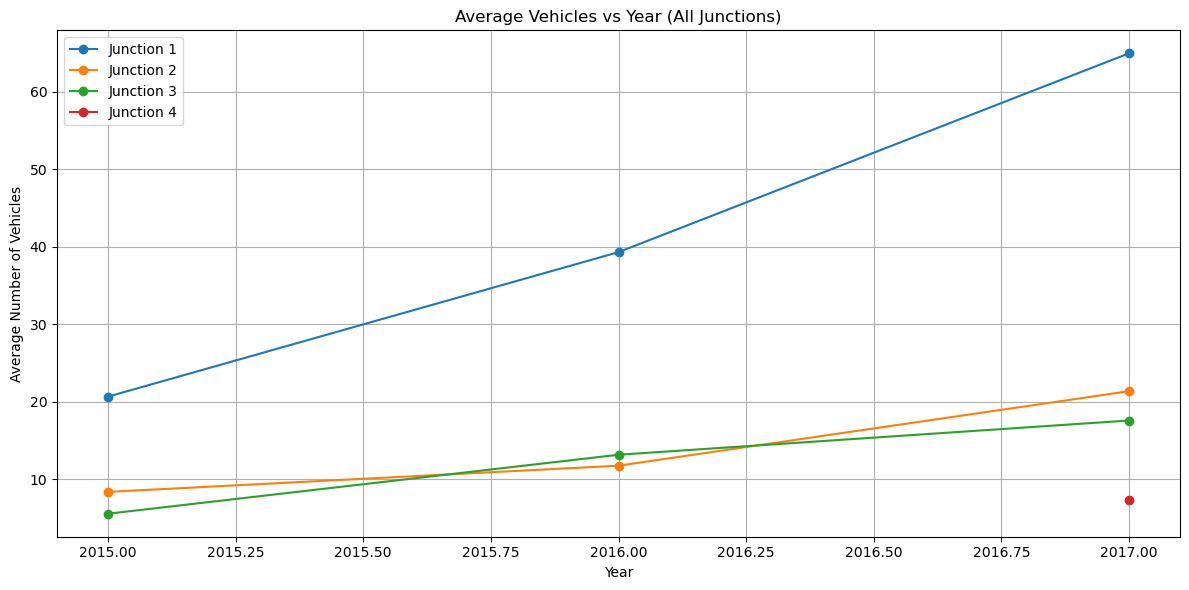

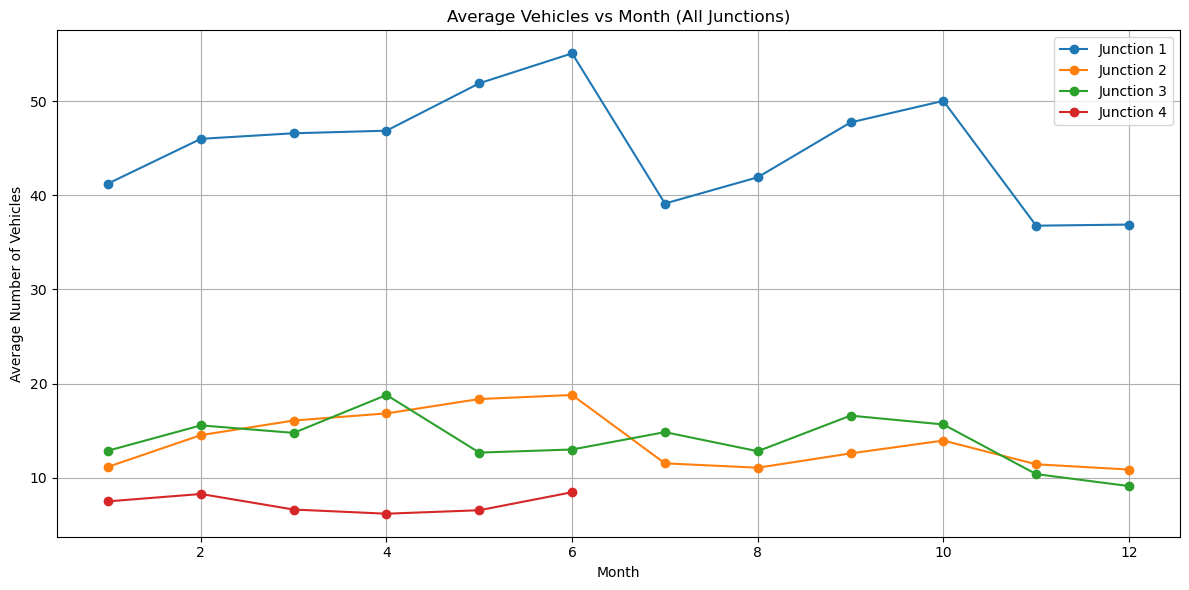

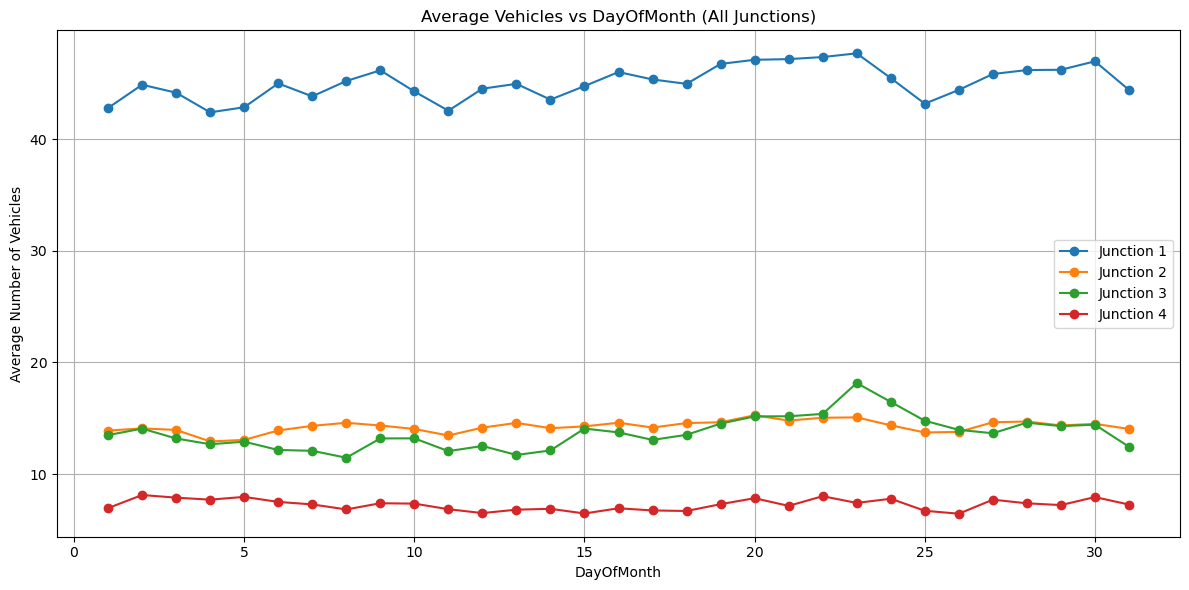

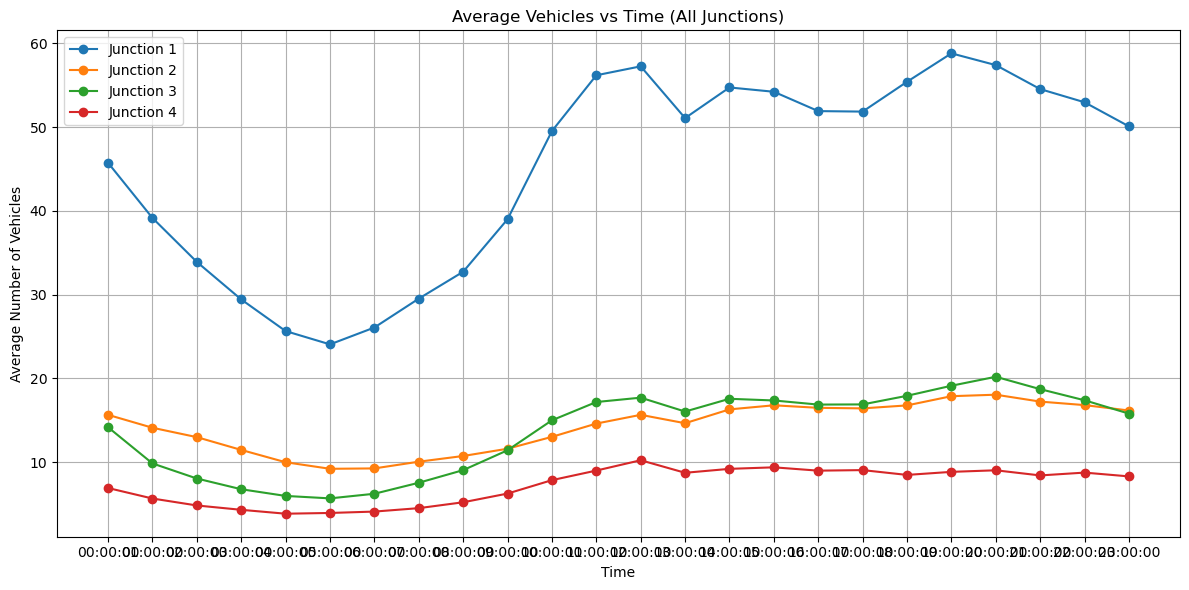

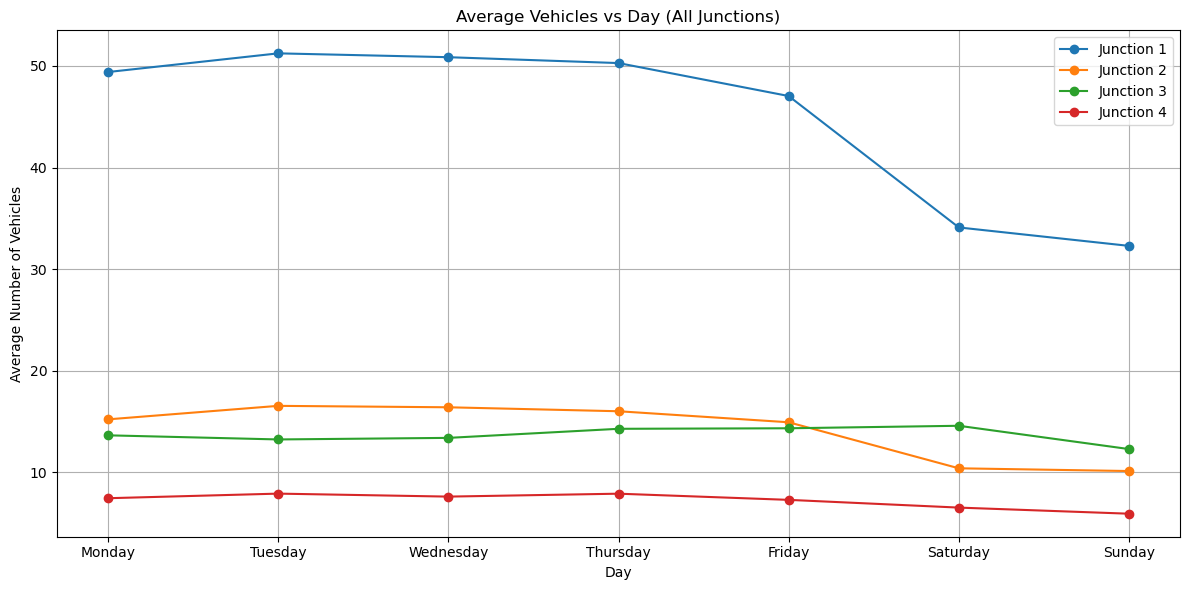

In [6]:
# Make sure time is a string for sorting
data['Time'] = data['Time'].astype(str)

# Define day order for proper sorting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Variables to plot
x_vars = ['Year', 'Month', 'DayOfMonth', 'Time', 'Day']
junctions = data['Junction'].unique()

for x in x_vars:
    plt.figure(figsize=(12, 6))

    for junction in junctions:
        df_junc = data[data['Junction'] == junction]

        # Group and sort accordingly
        if x == 'Time':
            grouped = df_junc.groupby(x)['Vehicles'].mean()
        elif x == 'Day':
            grouped = df_junc.groupby(x)['Vehicles'].mean().reindex(day_order)
        else:
            grouped = df_junc.groupby(x)['Vehicles'].mean().sort_index()

        # Plot each junction's line on the same graph
        plt.plot(grouped.index, grouped.values, label=f'Junction {junction}', marker='o')

    # Add labels and legend
    plt.title(f'Average Vehicles vs {x} (All Junctions)')
    plt.xlabel(x)
    plt.ylabel('Average Number of Vehicles')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

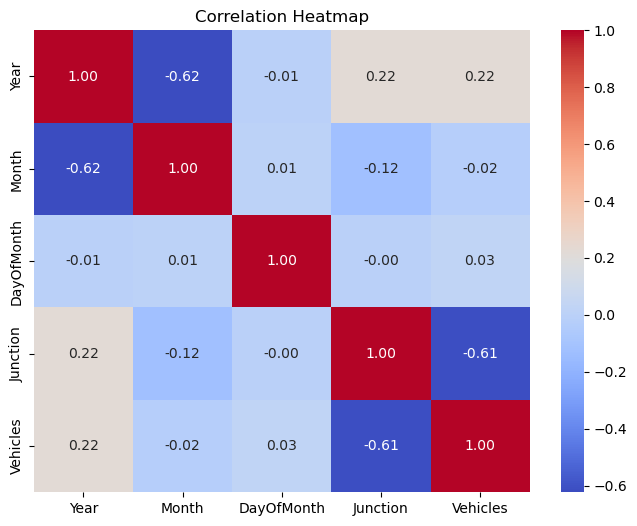

In [7]:
# Compute correlation matrix (only numerical columns)
corr = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Create the pairplot with pastel palette
sns.pairplot(data, hue='Junction', palette='pastel')
plt.suptitle("Pairplot of Traffic Data by Junction")
plt.show()

### Visualisation Observations

1. **Average Vehicles vs Year**
   - Traffic increases consistently from 2015 to 2017 for Junction 1,2 & 3.
   - Junction 1 shows the highest growth
   - Junction 4 shows average for 2017 only.

2. **Average Vehicles vs Month**
   - Monthly traffic fluctuates; peaks for Junction 1 occur in June.
   - Other junctions show moderate variation
   - Junction 4 stays relatively flat.

3. **Average Vehicles vs DayOfMonth**
   - Traffic is stable across days of the month.
   - No strong trends; Junction 1 consistently has higher counts.

4. **Average Vehicles vs Time**
   - Clear peak around midday and evening.
   - Early morning has lower traffic.
   - Junction 1 dominates traffic volume
   - Junction 4 remains lowest.

5. **Average Vehicles vs Day**
   - Higher traffic on weekdays, especially Thursday and Friday.
   - Noticeable drop on weekends across all junctions.

6. **Correlation Heatmap**
   - Vehicle count positively correlates with Year. (As Year increases, the vehicle count increase)
   - Vehicle count negatively correlates with Junction. (As Junction ID increase, the vehicle count decreases)

7. **Pairplot**
     - Junction 1 has higher vehicle density across most plots.
     - Distinct clusters are visible by junction, especially in the `Vehicles` vs `Year` and `Month` scatterplots.
     - `Vehicles` shows wide distribution for some junctions, suggesting variability in traffic volume.

These plots highlight temporal patterns and traffic disparities across junctions, useful for planning and analysis.

